# Описание задачи

Срочные депозиты являются основным источником дохода для банка. Срочный депозит – это вложение наличных денег в финансовом учреждении. Ваши деньги инвестируются по согласованной процентной ставке в течение фиксированного периода времени или срока. У банка есть различные планы по продаже срочных депозитов своим клиентам, такие как маркетинг по электронной почте, реклама, телефонный маркетинг и тд.

Телефонные маркетинговые кампании по-прежнему остаются одним из способов достучаться до людей. Но они требуют огромных инвестиций, поскольку для фактического проведения этих кампаний нанимаются крупные колл-центры. Следовательно, крайне важно заранее определить клиентов, которые с наибольшей вероятностью оформят вклад.

Цель нашего проекта — предсказать, подпишется ли клиент на срочный депозит.

У нас есть данные о клиентах некого банка, включая данные о том, оформили ли они вклад в этом банке

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/version/1?resource=download&select=train.csv - ссылка на данные

Подключаем библиотеки, нужные нам для работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as st
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Скачиваем датасет

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df_train = pd.read_csv('train.csv', low_memory=False)

# Описание данных

In [ ]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Расшифровка некоторых параметров датасета:

|              	|                                                                          	|
|:------------:	|:-------------------------------------------------------------------------------:	|
| age         	| возраст                              	|
| job    	| работа/род деятельности                                       	|
| marital     	| семейное положение                                       	|
| education    	| образование "3"                                                                  	|
| loan     	| есть ли кредит                    	|
| balance   	| среднегодовой баланс в евро                                                          	|
| housing 	|  есть ли жилищный кредит                                                     	|
| contact      	|           тип связи с клиентом                                      	|
| month     	| месяц последнего контакта с клиентом                    	|
| duration   	| продолжительность последнего разговора с клиентом в секундах                                                    	|
| campaign 	|  количество контактов, выполненных во время этой кампании                                                     	|
| pdays      	|    количество дней, прошедших после последнего контакта по предыдущей кампании                                     	|
| previous   	| количество контактов, выполненных до этой кампании                                                          	|
| poutcome 	|  результат предыдущей маркетинговой кампании                                                 	|
| subscribed      	|         подписал ли клиент срочный вклад                            	|

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Удалим не нужные для анализа данные

In [4]:
df_train.drop(['ID','poutcome'],axis=1,inplace=True)

Убедимся, что нет пропущенных значений

In [ ]:
df_train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

# EDA

**Числовые признаки**

In [ ]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Выводы:

1.   Можно предположить, что возраст распределен нормально, поскольку среднее и медиана почти равны
2.   У параметров balance и duration среднее значение больше медианы, что указывает на то, что оба значения смещены вправо и присутствуют высокие выбросы





Рассмотрим подробнее распределение возраста клиентов:

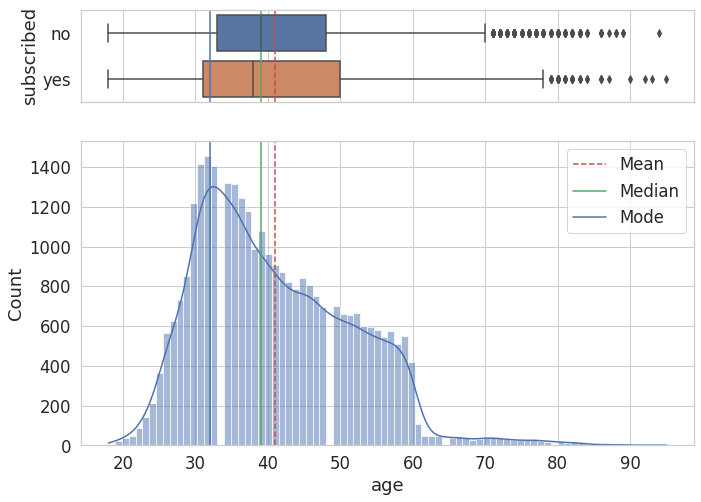

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df_train['age'].mean()
median=df_train['age'].median()
mode=df_train['age'].mode().values[0]

age = sns.boxplot(data=df_train, x="age", y="subscribed", ax=ax_box, order = df_train['subscribed'].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Убеждаемся, что распределение нормальное. Также можем увидеть, что целевая группа - клиенты от 30 до 50 лет, что логично, ведь люди этих возрастов наиболее стабильны

Среднегодовой баланс:

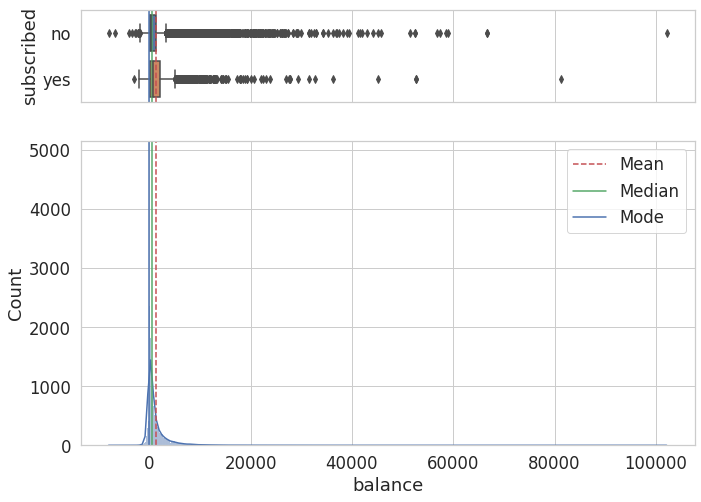

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df_train['balance'].mean()
median=df_train['balance'].median()
mode=df_train['balance'].mode().values[0]

balance = sns.boxplot(data=df_train, x="balance", y="subscribed", ax=ax_box, order = df_train["subscribed"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Видно, что большинство вкладичков имеют близкий к нулю среднегодовой баланс

День последнего контакта с клиентом:

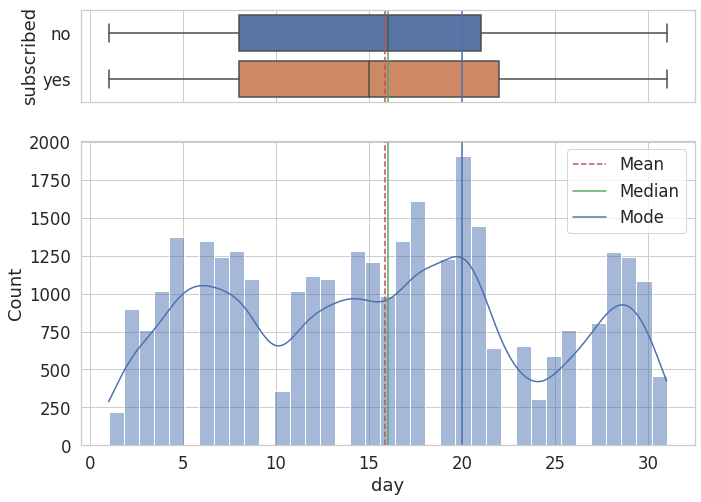

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df_train['day'].mean()
median=df_train['day'].median()
mode=df_train['day'].mode().values[0]

day = sns.boxplot(data=df_train, x="day", y="subscribed", ax=ax_box, order = df_train["subscribed"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Как мы и предполагали, никакой особой зависимости между днем и целевой переменной нет, данные распределены практически симметрично, поэтому этот признак можно удалить

По такому же принципу будут удалены следующие две переменные, так как они никак не влияют на результат.

Количество дней, прошедших после последнего контакта по предыдущей кампании:


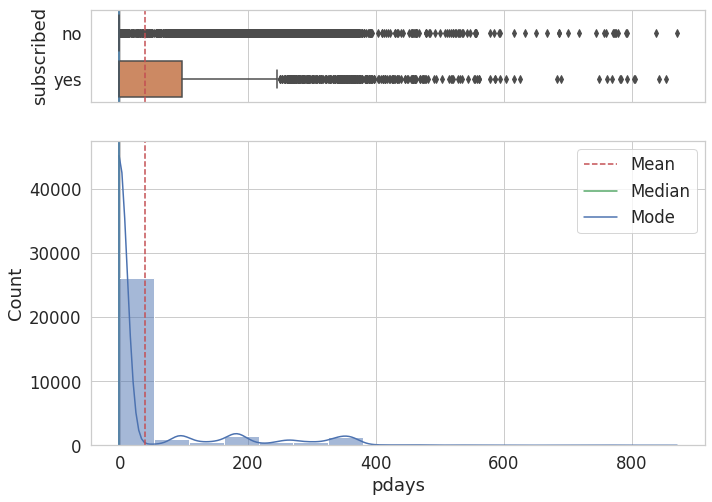

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df_train['pdays'].mean()
median=df_train['pdays'].median()
mode=df_train['pdays'].mode().values[0]

pdays = sns.boxplot(data=df_train, x="pdays", y="subscribed", ax=ax_box, order = df_train["subscribed"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

И количество контактов, выполненных до этой кампании (практически со всеми связывались впервые)


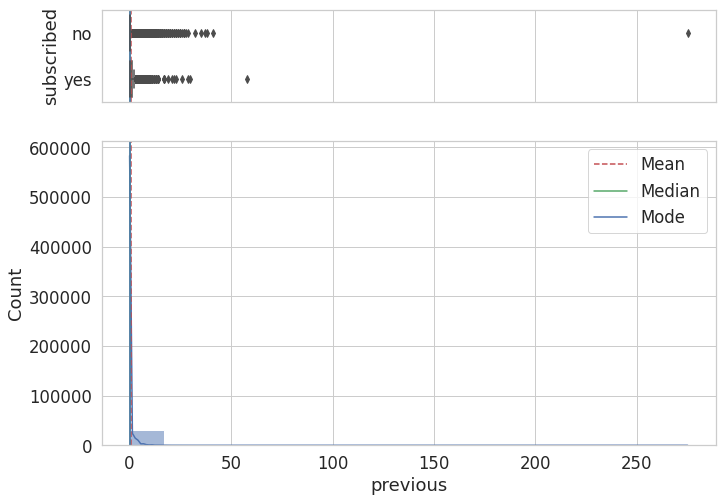

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.5, style='whitegrid')
mean=df_train['previous'].mean()
median=df_train['previous'].median()
mode=df_train['previous'].mode().values[0]

previous = sns.boxplot(data=df_train, x="previous", y="subscribed", ax=ax_box, order = df_train["subscribed"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [5]:
df_train.drop(['pdays','previous','day'],axis=1,inplace=True)

Но интересным оказался признак duration - продолжительность последнего контакта (в секундах):

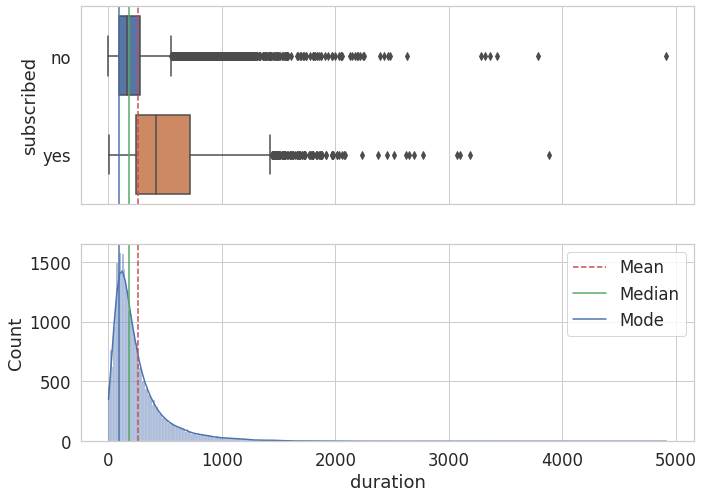

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df_train['duration'].mean()
median=df_train['duration'].median()
mode=df_train['duration'].mode().values[0]

duration = sns.boxplot(data=df_train, x="duration", y="subscribed", ax=ax_box, order = df_train["subscribed"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_train, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Очень хорошо видно, что если разгвор занимает мало времени, то большинство клиентов отклоняет предложение банка. Если же разгвор длится долго, значит клиент заинтересовался предложением и с большой вероятностью оформит вклад

**Категориальные признаки**

Посмотрим на общее количество подписавшихся и не подписавшихся на вклад людей

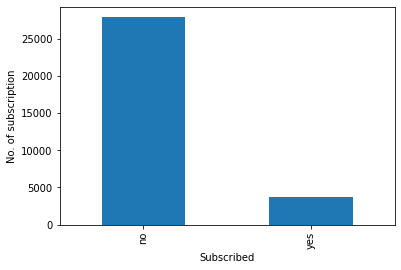

In [ ]:
df_train['subscribed'].value_counts().plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('No. of subscription')
plt.show()

In [ ]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Целевая переменная сильно несбалансирована, поэтому потребуется обработка несбалансированных данных

Теперь рассмотрим распределение подписавшихся по профессиям

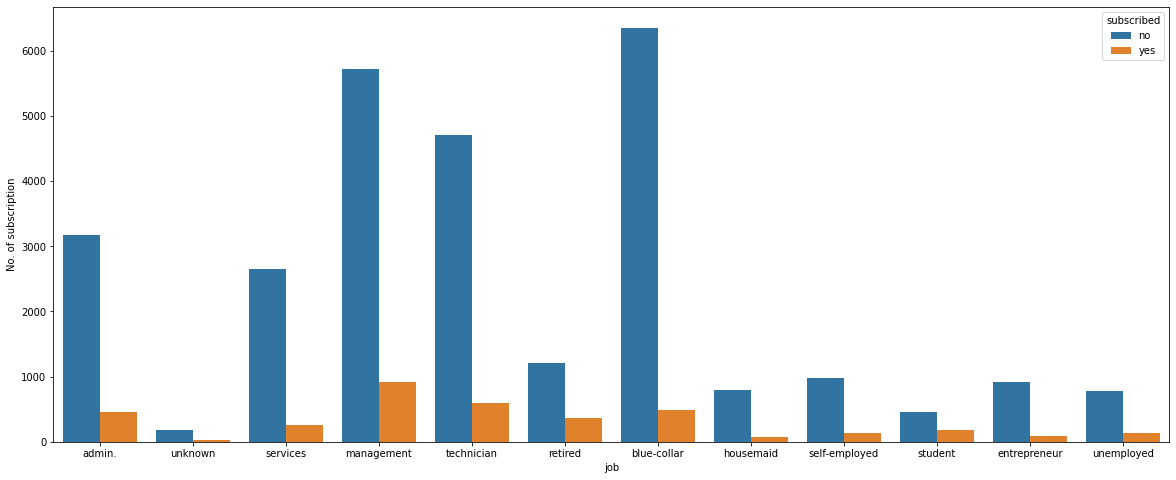

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_train,x='job',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

Можно сделать вывод о том, что большинство вкладчиков работают в области управления и технических областях

Распределение подписавшихся клиентов по семейному положению:

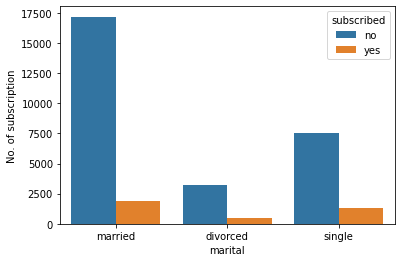

In [ ]:
sns.countplot(data=df_train,x='marital',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

Видно, что женатые люди больше заинтересованы в срочном вкладе

Распределение клиентов по образованию:

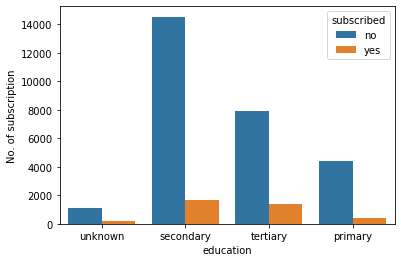

In [ ]:
sns.countplot(data=df_train,x='education',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

Клиенты со средним и высшим образованием чаще заключают договор о срочном вкладе

Распределение клиентов по наличию ипотеки:



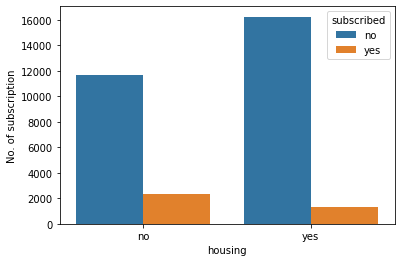

In [ ]:
sns.countplot(data=df_train,x='housing',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

У большинства вкладчиков нет ипотеки

Распределение по наличию кредита:

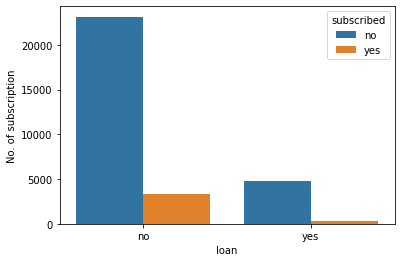

In [ ]:
sns.countplot(data=df_train,x='loan',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

Также у большинства вкалдчиков не имеется кредитов

Способ контка с клиентом:

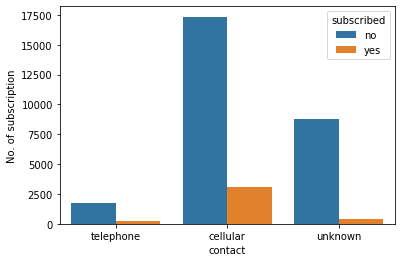

In [ ]:
sns.countplot(data=df_train,x='contact',hue='subscribed')
plt.ylabel('No. of subscription')
plt.show()

Большинство вкладчиков связываются с банком с помощью сотового телефона

Месяц последнего контакта с клиентом:

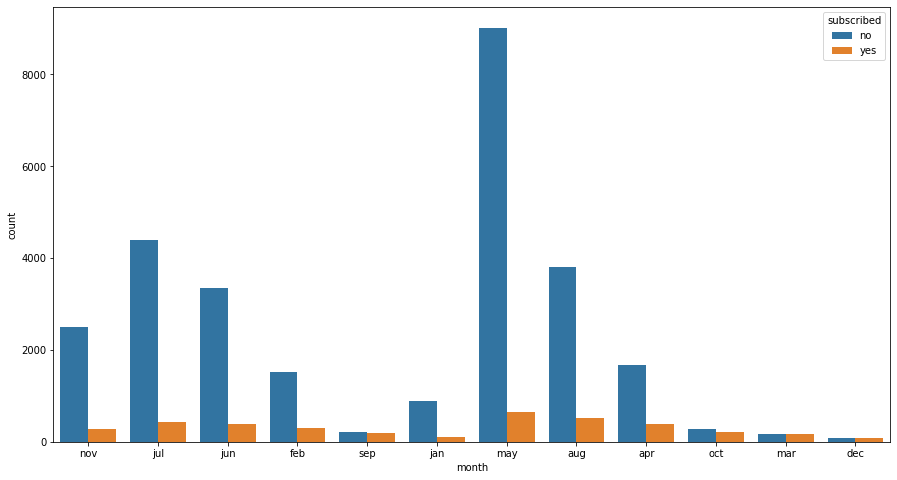

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,x='month',hue='subscribed')

Итак, исходя из приведенного выше исследовательского анализа данных, банк должен ориентироваться на следующий сегмент клиентов:

1.   Клиент, работающий в области управления, рабочих и технических областях
2.   Женатые клиенты чаще всего подписываются на продукт
3.   У клиента должно быть образование не ниже среднего
4.   Клиенты, имеющие ипотечный и персональный кредит, с меньшей вероятностью подпишутся на продукт
5.   Клиенты, подключенные через сотовый контакт, имеют высокую вероятность подписки на продукт
6.   Месяцы, наиболее подходящие для проведения маркетинговой кампании, — с апреля по август, а в мае больше всего шансов на то, что клиенты подпишутся на продукт


# Кодирование категориальных признаков

In [6]:
final_train = pd.get_dummies(data=df_train,columns=['job','marital','education','default','housing','loan','contact','month'])

In [7]:
final_train['subscribed']=final_train['subscribed'].replace('no',0)
final_train['subscribed']=final_train['subscribed'].replace('yes',1)

In [ ]:
final_train.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1933,19,44,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,57,3287,22,867,1,84,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Корреляция данных

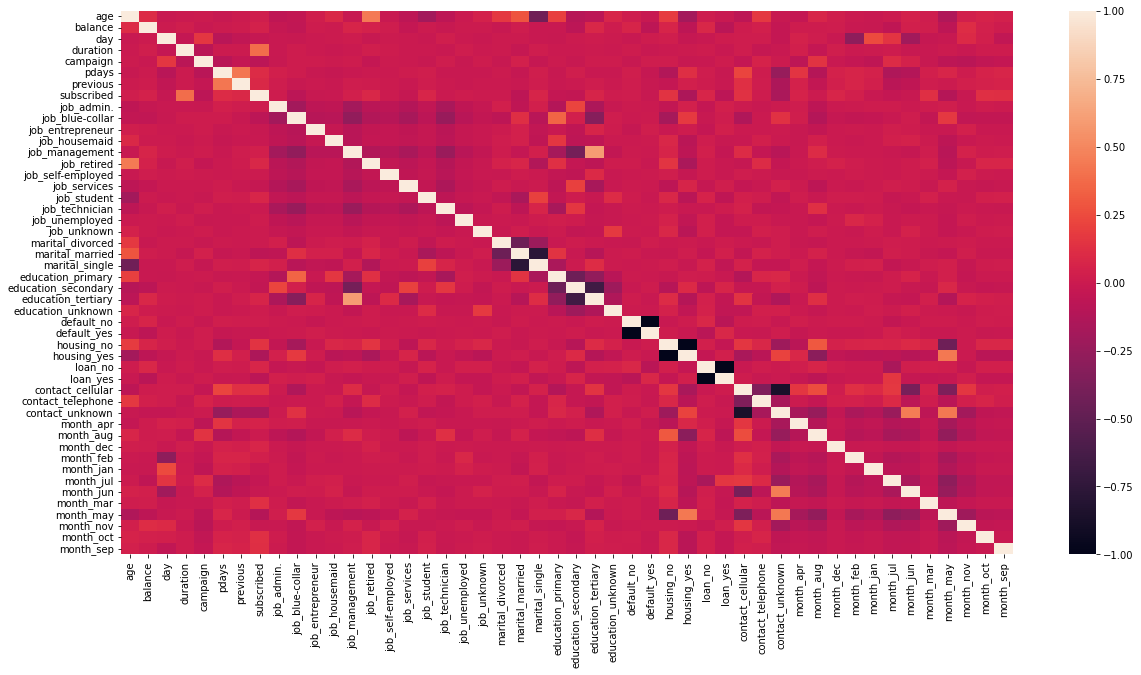

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(final_train.corr())

Как мы видим, признаков слишком много, отберем только те из них, где корреляция с признаком 'subscribed' больше 0.05

In [ ]:
cor=final_train.corr()
sub_cor=abs(cor['subscribed'])
sig_features=sub_cor[sub_cor>0.05]
print(sig_features)
print(sig_features.count())

balance               0.050807
duration              0.389838
campaign              0.070607
pdays                 0.108290
previous              0.088081
subscribed            1.000000
job_blue-collar       0.074922
job_retired           0.080029
job_student           0.075230
marital_married       0.064724
marital_single        0.066253
education_tertiary    0.069641
housing_no            0.141092
housing_yes           0.141092
loan_no               0.072266
loan_yes              0.072266
contact_cellular      0.138214
contact_unknown       0.151719
month_apr             0.056877
month_dec             0.074849
month_mar             0.127090
month_may             0.103581
month_oct             0.127530
month_sep             0.124028
Name: subscribed, dtype: float64
24


Данные переменные сильнее всего коррелируют с целевой переменной, а значит, являются наиболее важными

# Построение модели

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

**Разделение на Train и Test**

In [9]:
X=final_train.drop('subscribed',axis=1)
y=final_train['subscribed']

In [10]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Удалим наименее необходимые для дальнейшего анализа параметры у каждого признака

In [11]:
df= final_train.drop(['job_admin.','marital_divorced','education_primary','default_no','loan_no','housing_no','contact_unknown','month_apr'],axis=1)

In [12]:
X=df
X=df.drop('subscribed',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

**Балансировка данных**




In [23]:
Xytrain = pd.concat([X_train,y_train],axis=1)

print('до балансировки: ','\n', Xytrain['subscribed'].value_counts())
Xytrain0 = Xytrain[Xytrain['subscribed']==0]
Xytrain1 = Xytrain[Xytrain['subscribed']==1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain1_os = Xytrain1.sample(len0,replace = True, random_state=3)
Xytrain_os = pd.concat([Xytrain0, Xytrain1_os],axis=0)

print('после балансировки: ','\n',Xytrain_os['subscribed'].value_counts())

y_train_os = Xytrain_os['subscribed']
X_train_os = Xytrain_os.drop('subscribed',axis=1)

до балансировки:  
 0    19554
1     2598
Name: subscribed, dtype: int64
после балансировки:  
 0    19554
1    19554
Name: subscribed, dtype: int64


**Стандартизация данных**

In [15]:
ss = StandardScaler()

Xtrains = ss.fit_transform(X_train_os)
Xtests = ss.transform(X_test)

In [16]:
def model_eval(algo, Xtrains, y_train_os, Xtests, y_test):
    algo.fit(Xtrains,y_train_os)
    ytrain_pred = algo.predict(Xtrains)
    ytrain_prob = algo.predict_proba(Xtrains)[:,1]

    print('Overall accuracy - train:' , accuracy_score(y_train_os, ytrain_pred))
    print('Confusion matrix - train: ','\n',confusion_matrix(y_train_os,ytrain_pred))
    print('AUC - train', roc_auc_score(y_train_os,ytrain_prob))
    print('\n')
    print('Classification report - train: ','\n',classification_report(y_train_os,ytrain_pred))

    ytest_pred = algo.predict(Xtests)
    ytest_prob = algo.predict_proba(Xtests)[:,1]
    
    print('\n')
    print('Overall accuracy - test:' , accuracy_score(y_test, ytest_pred))
    print('Confusion matrix - test: ','\n',confusion_matrix(y_test,ytest_pred))
    print('AUC - test', roc_auc_score(y_test,ytest_prob))
    print('Classification report - test: ','\n',classification_report(y_test,ytest_pred))

    fpr,tpr,thresholds = roc_curve(y_test,ytest_prob)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

**Logistic Regression**

Overall accuracy - train: 0.819371995499642
Confusion matrix - train:  
 [[16184  3370]
 [ 3694 15860]]
AUC - train 0.8928935973863886


Classification report - train:  
               precision    recall  f1-score   support

           0       0.81      0.83      0.82     19554
           1       0.82      0.81      0.82     19554

    accuracy                           0.82     39108
   macro avg       0.82      0.82      0.82     39108
weighted avg       0.82      0.82      0.82     39108



Overall accuracy - test: 0.8229594523433386
Confusion matrix - test:  
 [[6915 1463]
 [ 218  899]]
AUC - test 0.8974790734910654
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      8378
           1       0.38      0.80      0.52      1117

    accuracy                           0.82      9495
   macro avg       0.68      0.82      0.70      9495
weighted avg       0.90      0.82      0.85      9495



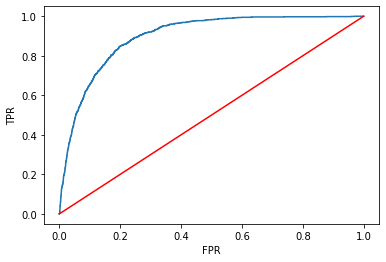

In [19]:
lr=LogisticRegression(solver='liblinear', fit_intercept=True,random_state=3)
model_eval(lr, Xtrains, y_train_os, Xtests, y_test)

**Decision Tree Classifier**

Overall accuracy - train: 0.7883297535031195
Confusion matrix - train:  
 [[14687  4867]
 [ 3411 16143]]
AUC - train 0.8649463165650361


Classification report - train:  
               precision    recall  f1-score   support

           0       0.81      0.75      0.78     19554
           1       0.77      0.83      0.80     19554

    accuracy                           0.79     39108
   macro avg       0.79      0.79      0.79     39108
weighted avg       0.79      0.79      0.79     39108



Overall accuracy - test: 0.7612427593470248
Confusion matrix - test:  
 [[6330 2048]
 [ 219  898]]
AUC - test 0.8557702068746791
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      8378
           1       0.30      0.80      0.44      1117

    accuracy                           0.76      9495
   macro avg       0.64      0.78      0.65      9495
weighted avg       0.89      0.76      0.80      9495



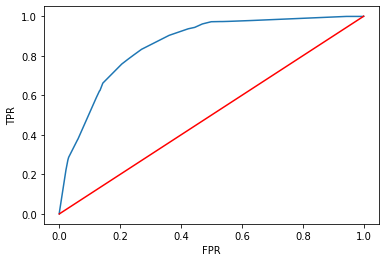

In [20]:
dt=DecisionTreeClassifier(max_depth = 5, criterion = 'gini',random_state=3)
model_eval(dt, Xtrains, y_train_os, Xtests, y_test)

**Random Forest Classifier**

Overall accuracy - train: 0.8218778766492789
Confusion matrix - train:  
 [[15107  4447]
 [ 2519 17035]]
AUC - train 0.8946935527979163


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.77      0.81     19554
           1       0.79      0.87      0.83     19554

    accuracy                           0.82     39108
   macro avg       0.83      0.82      0.82     39108
weighted avg       0.83      0.82      0.82     39108



Overall accuracy - test: 0.7839915745129016
Confusion matrix - test:  
 [[6488 1890]
 [ 161  956]]
AUC - test 0.8861610095759601
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      8378
           1       0.34      0.86      0.48      1117

    accuracy                           0.78      9495
   macro avg       0.66      0.82      0.67      9495
weighted avg       0.90      0.78      0.82      9495



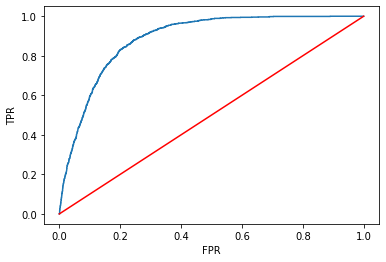

In [17]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,random_state=3)
model_eval(rf, Xtrains, y_train_os, Xtests, y_test)

**Adaboost**

Overall accuracy - train: 0.8194742763628925
Confusion matrix - train:  
 [[16038  3516]
 [ 3544 16010]]
AUC - train 0.8959282408887256


Classification report - train:  
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     19554
           1       0.82      0.82      0.82     19554

    accuracy                           0.82     39108
   macro avg       0.82      0.82      0.82     39108
weighted avg       0.82      0.82      0.82     39108



Overall accuracy - test: 0.8197998946814112
Confusion matrix - test:  
 [[6880 1498]
 [ 213  904]]
AUC - test 0.8947833168380417
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      8378
           1       0.38      0.81      0.51      1117

    accuracy                           0.82      9495
   macro avg       0.67      0.82      0.70      9495
weighted avg       0.90      0.82      0.85      9495



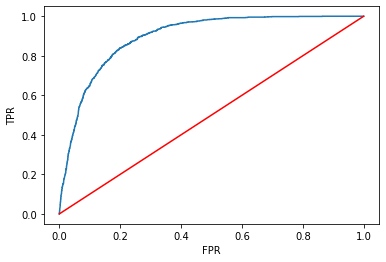

In [21]:
ada = AdaBoostClassifier(random_state = 3)
model_eval(ada, Xtrains, y_train_os, Xtests, y_test)

Применялись различные алгоритмы классификации, чтобы проверить, какой из них даст наиболее точный результат со существенными особенностями.